<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.--Import-Packages" data-toc-modified-id="1.--Import-Packages-1">1.  Import Packages</a></span></li><li><span><a href="#2.-Read-in-Data" data-toc-modified-id="2.-Read-in-Data-2">2. Read in Data</a></span></li><li><span><a href="#3.-Data-Frame-Cleaning" data-toc-modified-id="3.-Data-Frame-Cleaning-3">3. Data Frame Cleaning</a></span></li><li><span><a href="#4.-Text-Cleaning" data-toc-modified-id="4.-Text-Cleaning-4">4. Text Cleaning</a></span><ul class="toc-item"><li><span><a href="#Initial-HTML-Cleaning" data-toc-modified-id="Initial-HTML-Cleaning-4.1">Initial HTML Cleaning</a></span></li><li><span><a href="#Links-Cleaning" data-toc-modified-id="Links-Cleaning-4.2">Links Cleaning</a></span></li><li><span><a href="#Additional-HTML--and-Other-Text-Cleaning" data-toc-modified-id="Additional-HTML--and-Other-Text-Cleaning-4.3">Additional HTML  and Other Text Cleaning</a></span></li></ul></li><li><span><a href="#5.-Exploratory-Data-Analysis-and-Visualizations" data-toc-modified-id="5.-Exploratory-Data-Analysis-and-Visualizations-5">5. Exploratory Data Analysis and Visualizations</a></span></li><li><span><a href="#6.-Modeling" data-toc-modified-id="6.-Modeling-6">6. Modeling</a></span><ul class="toc-item"><li><span><a href="#Baseline-Score" data-toc-modified-id="Baseline-Score-6.1">Baseline Score</a></span></li><li><span><a href="#Broad-Classification-Model" data-toc-modified-id="Broad-Classification-Model-6.2">Broad Classification Model</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6.2.1">Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Count-Vectorizer-Version" data-toc-modified-id="Count-Vectorizer-Version-6.2.1.1">Count Vectorizer Version</a></span></li><li><span><a href="#TFIDF-Vectorizer-Version" data-toc-modified-id="TFIDF-Vectorizer-Version-6.2.1.2">TFIDF Vectorizer Version</a></span></li></ul></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-6.2.2">Naive Bayes</a></span><ul class="toc-item"><li><span><a href="#Count-Vectorizer-Version" data-toc-modified-id="Count-Vectorizer-Version-6.2.2.1">Count Vectorizer Version</a></span></li><li><span><a href="#TFIDF-Vectorizer-Version" data-toc-modified-id="TFIDF-Vectorizer-Version-6.2.2.2">TFIDF Vectorizer Version</a></span></li></ul></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-6.2.3">Decision Trees</a></span></li></ul></li></ul></li><li><span><a href="#7.--Modeling-With-Additional-Stop-Words" data-toc-modified-id="7.--Modeling-With-Additional-Stop-Words-7">7.  Modeling With Additional Stop Words</a></span><ul class="toc-item"><li><span><a href="#Adding-Stop-Words" data-toc-modified-id="Adding-Stop-Words-7.1">Adding Stop Words</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-7.2">Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Feature-Importance-Table" data-toc-modified-id="Feature-Importance-Table-7.2.1">Feature Importance Table</a></span></li></ul></li></ul></li><li><span><a href="#8.-Conclusions-and-Recommendation" data-toc-modified-id="8.-Conclusions-and-Recommendation-8">8. Conclusions and Recommendation</a></span></li></ul></div>

# 1.  Import Packages

In [1]:
import pandas as pd
import numpy as np
import requests
import time
import nltk
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
import regex as re
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split, GridSearchCV
from bs4 import BeautifulSoup  
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import stop_words
import matplotlib.pyplot as plt
from mlxtend.preprocessing import DenseTransformer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nick_cote/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nick_cote/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. Read in Data

Please note that the process for creating this data frame is detailed in the code book titled:  "1.movies_television_webscraping".

In [2]:
data = pd.read_csv('../data/final_movies_data.csv')

In [3]:
data.head()

,Unnamed: 0,title,text,subreddit,all_text,is_movies
0,0,We’re Jesse Eisenberg and Ruben Fleischer. ZOM...,Hi Reddit! Jesse Eisenberg and Ruben Fleischer...,movies,We’re Jesse Eisenberg and Ruben Fleischer. ZOM...,1
1,1,Elton John Says Disney's Lion King Remake Was ...,NaN,movies,Elton John Says Disney's Lion King Remake Was ...,1
2,2,"Ryan Reynolds, John Krasinski Teaming Up for F...",NaN,movies,"Ryan Reynolds, John Krasinski Teaming Up for F...",1
3,3,Netflix Sued For Libel &amp; Trademark Infring...,NaN,movies,Netflix Sued For Libel &amp; Trademark Infring...,1
4,4,‘Matrix 4’: Neil Patrick Harris Lands Role in ...,NaN,movies,‘Matrix 4’: Neil Patrick Harris Lands Role in ...,1


In [4]:
data.tail()

,Unnamed: 0,title,text,subreddit,all_text,is_movies
2445,2445,"""The Leftovers"" - 33 minutes if Max Richter's ...",NaN,television,"""The Leftovers"" - 33 minutes if Max Richter's ...",0
2446,2446,Love Island - SNL,NaN,television,Love Island - SNL,0
2447,2447,Netflix Animated Series ‘Big Mouth’ Is Under F...,NaN,television,Netflix Animated Series ‘Big Mouth’ Is Under F...,0
2448,2448,Two questions about the money tv makes off rat...,1.Why do shows that air in other countries but...,television,Two questions about the money tv makes off rat...,0
2449,2449,Is Jenny McCarthy the stupidest person on tele...,"My wife and daughter love The Masked Singer, s...",television,Is Jenny McCarthy the stupidest person on tele...,0


# 3. Data Frame Cleaning

Before accounting for cleaning up text to run through our model, we want to be sure that our (relatively small) data frame is cleaned up.  This means dropping the 'Unnamed: 0' column and filling the null values.  Additionally, we want to drop the duplicate columns.

In [5]:
# dropping unnamed 0 column
data.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
data.isnull().sum()

title           0
text         1396
subreddit       0
all_text        0
is_movies       0
dtype: int64

In [7]:
# filling nulls with blanks
data = data.fillna('')

In [8]:
data.isnull().sum()

title        0
text         0
subreddit    0
all_text     0
is_movies    0
dtype: int64

In [9]:
data['is_movies'].value_counts()

0    1229
1    1221
Name: is_movies, dtype: int64

In [10]:
# dropping duplicate rows
data.drop_duplicates(inplace = True)

In [11]:
data['is_movies'].value_counts()

0    704
1    436
Name: is_movies, dtype: int64

In [12]:
data = data.reset_index(drop=True)

In [13]:
data.tail()

,title,text,subreddit,all_text,is_movies
1135,If you have Sirius XM they've added a new John...,I just stumbled onto this channel and it's inc...,television,If you have Sirius XM they've added a new John...,0
1136,Do you watch more than 1 show at once?,Hi first post here\n\nThis year is the year I ...,television,Do you watch more than 1 show at once? Hi firs...,0
1137,'Florida Girls' Renewed for Season 2 on Pop,,television,'Florida Girls' Renewed for Season 2 on Pop,0
1138,"ESPN’s politics policy, and its journalism, te...",,television,"ESPN’s politics policy, and its journalism, te...",0
1139,Empire: The 100 Greatest TV Shows Of All Time,,television,Empire: The 100 Greatest TV Shows Of All Time,0


We note that there is now less of an even split in our data between the movies and television subreddits.  However, we will proceed with this data frame as there are still a substantial amount of positive class observations.

Additionally, we notice one other thing.  For clarity, we want to make television subreddits the positive class, so we will flip the classes here and rename the column "is_tv".

In [14]:
data['is_movies'] = data['is_movies'].map({0 : 1, 1 : 0})
data.rename(columns = {'is_movies' : 'is_tv'}, inplace = True)

In [15]:
data.head()

,title,text,subreddit,all_text,is_tv
0,We’re Jesse Eisenberg and Ruben Fleischer. ZOM...,Hi Reddit! Jesse Eisenberg and Ruben Fleischer...,movies,We’re Jesse Eisenberg and Ruben Fleischer. ZOM...,0
1,Elton John Says Disney's Lion King Remake Was ...,,movies,Elton John Says Disney's Lion King Remake Was ...,0
2,"Ryan Reynolds, John Krasinski Teaming Up for F...",,movies,"Ryan Reynolds, John Krasinski Teaming Up for F...",0
3,Netflix Sued For Libel &amp; Trademark Infring...,,movies,Netflix Sued For Libel &amp; Trademark Infring...,0
4,‘Matrix 4’: Neil Patrick Harris Lands Role in ...,,movies,‘Matrix 4’: Neil Patrick Harris Lands Role in ...,0


# 4. Text Cleaning

## Initial HTML Cleaning

The key component of our data cleaning is clearing out the HTML pieces and links from the all_text column in our data frame.  First we move to run a simple Beautiful Soup package that clears SOME HTML text.  We will need to do further digging after this.

In [16]:
data.head()

,title,text,subreddit,all_text,is_tv
0,We’re Jesse Eisenberg and Ruben Fleischer. ZOM...,Hi Reddit! Jesse Eisenberg and Ruben Fleischer...,movies,We’re Jesse Eisenberg and Ruben Fleischer. ZOM...,0
1,Elton John Says Disney's Lion King Remake Was ...,,movies,Elton John Says Disney's Lion King Remake Was ...,0
2,"Ryan Reynolds, John Krasinski Teaming Up for F...",,movies,"Ryan Reynolds, John Krasinski Teaming Up for F...",0
3,Netflix Sued For Libel &amp; Trademark Infring...,,movies,Netflix Sued For Libel &amp; Trademark Infring...,0
4,‘Matrix 4’: Neil Patrick Harris Lands Role in ...,,movies,‘Matrix 4’: Neil Patrick Harris Lands Role in ...,0


In [17]:
clean_text = [BeautifulSoup(data.loc[row,'all_text'],'lxml').text for row in list(range(data.shape[0]))]
data['all_text'] = clean_text

In [18]:
data.head()

,title,text,subreddit,all_text,is_tv
0,We’re Jesse Eisenberg and Ruben Fleischer. ZOM...,Hi Reddit! Jesse Eisenberg and Ruben Fleischer...,movies,We’re Jesse Eisenberg and Ruben Fleischer. ZOM...,0
1,Elton John Says Disney's Lion King Remake Was ...,,movies,Elton John Says Disney's Lion King Remake Was ...,0
2,"Ryan Reynolds, John Krasinski Teaming Up for F...",,movies,"Ryan Reynolds, John Krasinski Teaming Up for F...",0
3,Netflix Sued For Libel &amp; Trademark Infring...,,movies,Netflix Sued For Libel & Trademark Infringemen...,0
4,‘Matrix 4’: Neil Patrick Harris Lands Role in ...,,movies,‘Matrix 4’: Neil Patrick Harris Lands Role in ...,0


## Links Cleaning

Next, we'll work to remove all links from the text.

In [19]:
# the below regex code replaces the links that being in http in our text
data['all_text'] = data.loc[:, 'all_text'].map(lambda row : re.sub(r'http\S+', '', row))

## Additional HTML  and Other Text Cleaning

We found that while our Beautiful Soup object was pretty helpful in providing an initial clean to the HTML characters, we discover in looking at our text items that there are still some characters left over.  Although some could be removed just with blanks, we will actually replace these with spaces.  After examining the text, some of these characters mistakenly join words together.  If we add extra spaces now that will be fine as our Vectorizers will fix these when we model.

Other pieces of string I want to remove include:
- "'ve" because this is showing up as a very common word in count vectorizer.  It stands to reason that the roots of these words are being removed anyway in the stop words process, so this piece of the contraction should be as well

In [20]:
# list of leftover HTML characters to clean out with blanks
html_chars = ['\n', '\ufeff', '>', '**', '\'ve']

In [21]:
for char in html_chars:
    data['all_text'] = data.loc[:, 'all_text'].map(lambda text : text.replace(char, ' '))

In [22]:
# the below is a quick reference cell to confirm that the code has been successful
data.loc[11, 'all_text']

"El Camino had a different ending originally (Spoilers) Source:   One of Gilligan’s quotes from the article:   I didn’t get super far down the road, but it was probably going to be a young woman who needed some help,” he says. “He was hiding out by the Canadian border, and this woman was working at a motel as a housekeeper or something.  [He] goes into the process of saving her, knowing full well that he’s going to suffer for it, he’s going to get caught for it, but he does it anyway. And the last scene would be maybe him in a jail cell but at peace for the first time since the movie began. I think there was going to be this component where he couldn’t sleep. He wouldn’t get a single night sleep for a week or so upon escaping. The police are looking for him and he’s too haunted and he’s too adrenaline-charged. And at the end of the thing, he’s in a jail cell, and ironically he can fall asleep like a baby. And I thought, ‘Ah, that’d be kind of cool.'”  Apparently Golligan’s partner as w

# 5. Exploratory Data Analysis and Visualizations

The crucial component of our data analysis will be seeing which words appear most often in the posts for the respective subreddits. First, I want to separate the data into movies and tv frames and then I can count vectorize each frame to get an idea of how to handle this.

In [23]:
data_movies = data[data['is_tv'] == 0]
data_movies.shape

(436, 5)

In [24]:
data_tv = data[data['is_tv'] == 1]
data_tv.shape

(704, 5)

In [25]:
# creating a data frame for all words in movies
cv_movies = CountVectorizer(stop_words = 'english')
cv_movies.fit(data_movies['all_text'])
cv_movies_vector = cv_movies.transform(data_movies['all_text'])
movies_feat = pd.DataFrame(cv_movies_vector.todense(), columns = cv_movies.get_feature_names())
movies_feat

,00,000,001,01,02,045,050,06,068,071,...,zombi,zombie,zombieland,zombies,zone,zoomed,𝑩𝒆𝒔𝒕,𝒃𝒆,𝒉𝒊𝒎,𝒍𝒆𝒂𝒗𝒆
0,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# creating a data frame for all words in television
cv_tv = CountVectorizer(stop_words = 'english')
cv_tv.fit(data_tv['all_text'])
cv_tv_vector = cv_tv.transform(data_tv['all_text'])
tv_feat = pd.DataFrame(cv_tv_vector.todense(), columns = cv_tv.get_feature_names())
tv_feat

,000m,04,10,100,105,108,10p,10pm,10th,11,...,zelensky,zirinsky,zombie,zombies,zone,zoom,zooming,zsasz,zuko,übertwerp
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# returning a frame of the most common words in movies
top_movies_feat = pd.DataFrame(movies_feat.sum().sort_values(ascending = False).head(20))
top_movies_feat = top_movies_feat.reset_index(drop = False)
top_movies_feat.rename(columns = {'index': 'word', 0: 'count'}, inplace = True)
top_movies_feat

,word,count
0,movie,425
1,movies,217
2,film,213
3,like,186
4,just,181
5,time,133
6,think,122
7,really,107
8,know,100
9,people,99


In [28]:
# returning an array of the most common words in tv
top_tv_feat = pd.DataFrame(tv_feat.sum().sort_values(ascending = False).head(20))
top_tv_feat = top_tv_feat.reset_index(drop = False)
top_tv_feat.rename(columns = {'index': 'word', 0: 'count'}, inplace = True)
top_tv_feat

,word,count
0,season,214
1,just,177
2,like,175
3,series,160
4,tv,153
5,episode,134
6,shows,128
7,really,108
8,netflix,84
9,new,77


Below is a bar chart detailing the most common words in movies:

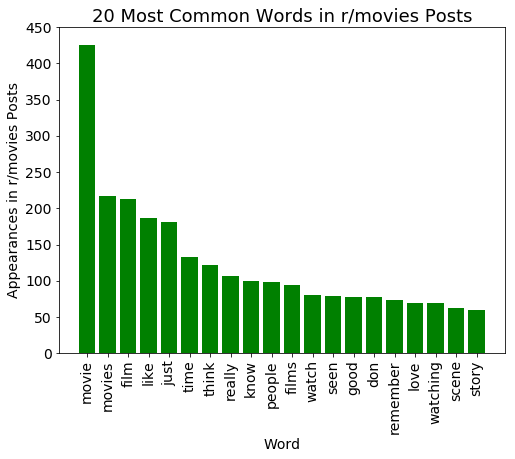

In [29]:
plt.figure(figsize = (8, 6))
plt.bar(top_movies_feat['word'], top_movies_feat['count'], color = 'green');
plt.xlabel('Word', size = 14);
plt.ylabel('Appearances in r/movies Posts', size = 14);
plt.title('20 Most Common Words in r/movies Posts', size = 18);
plt.xticks(rotation = 90, size = 14);
plt.yticks(size = 14);
plt.ylim([0, 450]);


And below is the bar chart detailing the most common words in recent television posts:

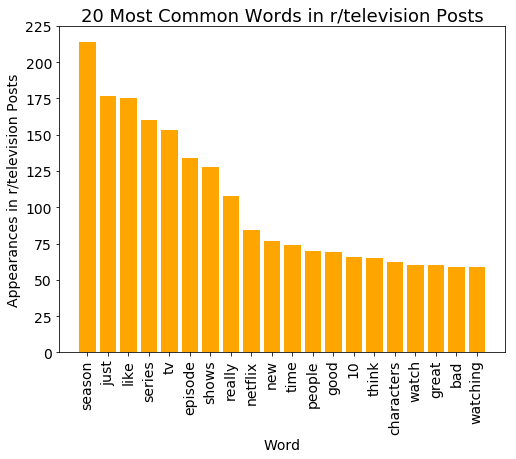

In [30]:
plt.figure(figsize = (8, 6))
plt.bar(top_tv_feat['word'], top_tv_feat['count'], color = 'orange');
plt.xlabel('Word', size = 14);
plt.ylabel('Appearances in r/television Posts', size = 14);
plt.title('20 Most Common Words in r/television Posts', size = 18);
plt.xticks(rotation = 90, size = 14);
plt.yticks(size = 14);

# 6. Modeling

## Baseline Score

In [31]:
data['is_tv'].value_counts(normalize = True)

1    0.617544
0    0.382456
Name: is_tv, dtype: float64

We note that our baseline score for our modeling is 38.2%.

## Broad Classification Model

First, I want to look at models that I expect to do well because they will contain some obvious words for classification (such as the names of the subreddit themselves).  After this, we will be looking deeper at sentiments and trends by excluding those words.

### Logistic Regression

#### Count Vectorizer Version

In [32]:
# defining X and Y and splitting to train text split
X = data['all_text']
y = data['is_tv']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22, stratify = y)

In [33]:
# setting pipeline and pipeline paramters

pipe_count = Pipeline([('cvec', CountVectorizer()), ('lr_count', LogisticRegression())])

pipe_params_count = {
    'cvec__max_features': [500, 1000, 1500, None],
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'cvec__min_df': [1, 2, 3, 4] 
}

In [34]:
# instaniate gridsearch
gs_count = GridSearchCV(pipe_count,
                        pipe_params_count,
                        cv = 3)

In [35]:
# fit our GridSearch
gs_count.fit(X_train, y_train)

/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [36]:
gs_count.best_params_

{'cvec__max_features': 1000,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

In [37]:
gs_count.best_score_

0.8783625730994152

Now that we've found the best parameters on our GridSearch, we can fit the model to our whole training and then testing data.

In [38]:
cvec = CountVectorizer(
    max_features = gs_count.best_params_['cvec__max_features'],
    min_df = gs_count.best_params_['cvec__min_df'],
    ngram_range = gs_count.best_params_['cvec__ngram_range'],
    stop_words = gs_count.best_params_['cvec__stop_words']
)
cvec.fit(X_train)
# transforming our X's
X_train_cv = cvec.transform(X_train)
X_test_cv = cvec.transform(X_test)

# instantiating and fitting our model
lr_count = LogisticRegression()
lr_count.fit(X_train_cv, y_train)

/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
lr_count.score(X_train_cv, y_train)

0.9555555555555556

In [40]:
lr_count.score(X_test_cv, y_test)

0.8491228070175438

Given our baseline score of 38.2%, this is a decent model.

We can now conduct some interesting analysis on the importance of the various features - notably, we can say that if a word appears in a given post, how much more likely is it to be in movies vs. tv.

In [41]:
lr_count_coef_df = pd.DataFrame(X_train_cv.todense(), columns = cvec.get_feature_names())
lr_count_coef_df.head()

,000,10,100,11,12,13,15,1999,1st,20,...,writing,written,wrong,x200b,year,years,yes,york,young,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
coef_df = pd.DataFrame({'term' : lr_count_coef_df.columns, 'coef': lr_count.coef_[0]})

In [43]:
coef_df['likelihood'] = np.exp(coef_df['coef'])

In [44]:
coef_df.sort_values('likelihood', ascending = False).tail(30)

,term,coef,likelihood
567,minutes,-0.610473,0.543094
540,make,-0.637054,0.528848
169,classic,-0.655536,0.519164
871,thanks,-0.662928,0.515340
390,gone,-0.666285,0.513613
713,remake,-0.687982,0.502589
893,tom,-0.692566,0.500291
139,career,-0.699572,0.496798
518,little,-0.702604,0.495294
8,1st,-0.705778,0.493724


We note that while some of features are pretty obvious (such as movie, film, movies, film, etc.) we actually find some interesting things in here.  For instance, poster, trailer, joins (presumably as in a cast), and oscar (as in the Oscars) all have prominent places in important words for movie classification. On the flip side, we see words such as comic, out, news, college, and discussion as important words for television classification. 

#### TFIDF Vectorizer Version

In [45]:
# setting pipeline and pipeline paramters

pipe_tfidf = Pipeline([('tvec', TfidfVectorizer()), ('lr', LogisticRegression())])

pipe_params_tfidf = {
    'tvec__max_features': [500, None],
    'tvec__stop_words': ['english', None],
    'tvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
}

In [46]:
# instantiate and fit grid search
# instaniate gridsearch
gs_tfidf = GridSearchCV(pipe_tfidf,
                        pipe_params_tfidf,
                        cv = 3)

gs_tfidf.fit(X_train, y_train)

/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

In [47]:
gs_tfidf.best_params_

{'tvec__max_features': 500,
 'tvec__ngram_range': (1, 3),
 'tvec__stop_words': 'english'}

In [48]:
gs_tfidf.best_score_

0.8584795321637427

Once again, we now create model using the established best paramters on our entire training data.

In [49]:
tvec = TfidfVectorizer(
    max_features = gs_tfidf.best_params_['tvec__max_features'],
    ngram_range = gs_tfidf.best_params_['tvec__ngram_range'],
    stop_words = gs_tfidf.best_params_['tvec__stop_words']
)
tvec.fit(X_train)
# transforming our X's
X_train_tvec = tvec.transform(X_train)
X_test_tvec = tvec.transform(X_test)

# instantiating and fitting our model
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tvec, y_train)

/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
lr_tfidf.score(X_train_tvec, y_train)

0.9169590643274854

In [51]:
lr_tfidf.score(X_test_tvec, y_test)

0.8596491228070176

It looks like for now, our Count Vectorizer gives us some better scores than our TFIDF vectorizer.

### Naive Bayes

#### Count Vectorizer Version

We will work with a Multinomial Naive Bayes model on our count vectorized features as our features will be taking on positive integer counts.

In [52]:
# instantiate pipeline and parameters
pipe_count_mnb = Pipeline([('cvec', CountVectorizer()), ('to_dense', DenseTransformer()), ('mnb', MultinomialNB())])

pipe_params_count_mnb = {
    'cvec__max_features': [500, None],
    'cvec__stop_words': ['english'],
    'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'cvec__min_df': [2, 3, 4] 
}

In [53]:
# instantiate and fit GridSearch
gs_count_mnb = GridSearchCV(pipe_count_mnb,
                            pipe_params_count_mnb,
                            cv = 3)

gs_count_mnb.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [54]:
gs_count_mnb.best_params_

{'cvec__max_features': None,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

In [55]:
gs_count_mnb.best_score_

0.8584795321637427

Now we need to create a MNB model using the best parameters determined during our GridSearch.

In [56]:
cvec_mnb = CountVectorizer(
    max_features = gs_count_mnb.best_params_['cvec__max_features'],
    min_df = gs_count_mnb.best_params_['cvec__min_df'],
    ngram_range = gs_count_mnb.best_params_['cvec__ngram_range'],
    stop_words = gs_count_mnb.best_params_['cvec__stop_words']
)
cvec_mnb.fit(X_train)
# transforming our X's
X_train_cv_mnb = cvec_mnb.transform(X_train)
X_test_cv_mnb = cvec_mnb.transform(X_test)

# instantiating and fitting our model
mnb = MultinomialNB()
mnb.fit(X_train_cv_mnb, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [57]:
mnb.score(X_train_cv_mnb, y_train)

0.9415204678362573

In [58]:
mnb.score(X_test_cv_mnb, y_test)

0.8596491228070176

#### TFIDF Vectorizer Version

Next, we will create a Gaussian Naive Bayes model with our TFIDF vectorizer as our TFIDF vectorizer gets us a somewhat normal distribution of vector values.

In [59]:
# instantiate pipeline and parameters
pipe_tfidf_gnb = Pipeline([('tvec', TfidfVectorizer()), ('to_dense', DenseTransformer()), ('gnb', GaussianNB())])

pipe_params_tfidf_gnb = {
    'tvec__max_features': [500, None],
    'tvec__stop_words': ['english', None],
    'tvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
}

In [60]:
# instantiate and fit our GridSearch
gs_tfidf_gnb = GridSearchCV(pipe_tfidf_gnb,
                            pipe_params_tfidf_gnb,
                            cv = 3)

gs_tfidf_gnb.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

In [61]:
gs_tfidf_gnb.best_params_

{'tvec__max_features': 500,
 'tvec__ngram_range': (1, 3),
 'tvec__stop_words': None}

In [62]:
gs_tfidf_gnb.best_score_

0.7567251461988304

Now we will create a Gaussian Naive Bayes model using our best paramters.

In [63]:
tvec_gnb = TfidfVectorizer(
    max_features = gs_tfidf_gnb.best_params_['tvec__max_features'],
    ngram_range = gs_tfidf_gnb.best_params_['tvec__ngram_range'],
    stop_words = gs_tfidf_gnb.best_params_['tvec__stop_words']
)
tvec_gnb.fit(X_train)
# transforming our X's
X_train_cv_gnb = tvec_gnb.transform(X_train).todense()
X_test_cv_gnb = tvec_gnb.transform(X_test).todense()

# instantiating and fitting our model
gnb = GaussianNB()
gnb.fit(X_train_cv_gnb, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
gnb.score(X_train_cv_gnb, y_train)

0.8713450292397661

In [65]:
gnb.score(X_test_cv_gnb, y_test)

0.7929824561403509

### Decision Trees

In [66]:
pipe_dt = Pipeline([('cvec', CountVectorizer()), ('dt', DecisionTreeClassifier())])

pipe_params_dt = {
    'cvec__max_features': [500, 1000, 1500, None],
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'cvec__min_df': [1, 2, 3, 4],
}

In [67]:
gs_dt = GridSearchCV(pipe_dt,
                        pipe_params_dt,
                        cv = 3)

In [68]:
gs_dt.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [69]:
gs_dt.best_score_

0.8374269005847953

In [70]:
gs_dt.best_params_

{'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

In [71]:
cvec = CountVectorizer(
    max_features = gs_dt.best_params_['cvec__max_features'],
    min_df = gs_dt.best_params_['cvec__min_df'],
    stop_words = gs_dt.best_params_['cvec__stop_words'],
    ngram_range = gs_dt.best_params_['cvec__ngram_range']
)
cvec.fit(X_train)
# transforming our X's
X_train_cvec = cvec.transform(X_train)
X_test_cvec = cvec.transform(X_test)

# instantiating and fitting our model
dt = DecisionTreeClassifier()
dt.fit(X_train_cvec, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [72]:
dt.score(X_train_cvec, y_train)

0.9988304093567252

In [73]:
dt.score(X_test_cvec, y_test)

0.8035087719298246

We see that while our Decision Tree is very strong on the Train data, it is very high variance (as we know is common with Decision Trees).  Of the models that we have looked at, Logistic Regression with Count Vectorizer returns the highest training score.

# 7.  Modeling With Additional Stop Words

We now see that we've built a fairly strong predictive model, with our best model using Count Vectorizer and a Logistic Regression model.  However, we now want to build a strong model that is interpretable in terms of what kind of content is in each subrettit and also does not contain obvious giveaways in the text that would successfully classify it in the correct subreddit.  As a result, I now want to build a Logistic Regression model using Count Vectorizers so that we can interpret the coefficients and assign "importance" to the features.  However, we also want to create a more robust stop words list so that there are not obvious giveaways and we can better compare things like sentiment, general topics, and analysis in the way that people talk about movies vs. television. 

## Adding Stop Words

In [74]:
type(stopwords.words('english'))

list

In [75]:
stop_words = list(stopwords.words('English'))

In [76]:
additional_stops = ['movie', 'movies', 'film', 'films', 'tv', 'television']

In [77]:
stop_words.extend(additional_stops)
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [78]:
stop_array = np.asarray(stop_words)
stop_array

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

## Logistic Regression

In addition to adding stop words, I want to limit my features to some degree.  Similar to my point above, I am trying to build a more focused model, even if that means I let some bias in.

In [79]:
# setting pipeline and pipeline paramters

pipe_count_final = Pipeline([('cvec', CountVectorizer()), ('lr_count', LogisticRegression())])

pipe_params_count_final = {
    'cvec__max_features': [500, 1000, 1500, 2000],
    'cvec__stop_words': [stop_words],
    'cvec__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'cvec__min_df': [2, 3, 4] 
}

In [80]:
# instaniate gridsearch
gs_count_final = GridSearchCV(pipe_count_final,
                        pipe_params_count_final,
                        cv = 3)

In [81]:
# fit our GridSearch
gs_count_final.fit(X_train, y_train)

/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [82]:
gs_count_final.best_params_

{'cvec__max_features': 1500,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  '

In [83]:
gs_count_final.best_score_

0.8292397660818713

Now that we've found the best parameters on our GridSearch, we can fit the model to our whole training and then testing data.

In [84]:
cvec_final = CountVectorizer(
    max_features = gs_count_final.best_params_['cvec__max_features'],
    min_df = gs_count_final.best_params_['cvec__min_df'],
    ngram_range = gs_count_final.best_params_['cvec__ngram_range'],
    stop_words = gs_count_final.best_params_['cvec__stop_words']
)
cvec_final.fit(X_train)
# transforming our X's
X_train_cv_final = cvec_final.transform(X_train)
X_test_cv_final = cvec_final.transform(X_test)

# instantiating and fitting our model
lr_count_final = LogisticRegression()
lr_count_final.fit(X_train_cv_final, y_train)

/Users/nick_cote/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
lr_count_final.score(X_train_cv_final, y_train)

0.9672514619883041

In [86]:
lr_count_final.score(X_test_cv_final, y_test)

0.8315789473684211

Compared to our model where we included the "obvious stop words, I am actually fairly pleased with how this turned out.  Our testing set accuracy only decreased from 86.0% to 81.8% - a dropoff, but our model is still pretty accurate.

We can now conduct some interesting analysis on the importance of the various features - notably, we can say that if a word appears in a given post, how much more likely is it to be in movies vs. tv.

### Feature Importance Table

In [87]:
lr_count_final_coef_df = pd.DataFrame(X_train_cv_final.todense(), columns = cvec_final.get_feature_names())
lr_count_final_coef_df.head()

,00,10,100,11,12,13,15,16,1999,1st,...,year,years,yes,yet,york,young,younger,youtube,zombie,zombieland
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [88]:
coef_final_df = pd.DataFrame({'term' : lr_count_final_coef_df.columns, 'coef': lr_count_final.coef_[0]})

In [89]:
coef_final_df['likelihood'] = np.exp(coef_final_df['coef'])

In [90]:
coef_final_df.sort_values('likelihood', ascending = False).head(30)

,term,coef,likelihood
1129,season,2.248446,9.473008
1145,series,1.925752,6.860304
1164,show,1.742544,5.711853
426,episode,1.375005,3.955098
1191,snl,1.280792,3.599488
1168,shows,1.026128,2.790242
1357,trek,0.962951,2.619415
45,adaptation,0.923123,2.517140
323,cw,0.891675,2.439211
106,apple,0.889289,2.433400


In [91]:
coef_final_df.sort_values('likelihood', ascending = True).head(30)

,term,coef,likelihood
976,poster,-1.678951,0.186570
622,horror,-1.311711,0.269359
802,mark,-1.234491,0.290983
1341,tom,-1.046191,0.351273
800,man,-0.970464,0.378907
903,official,-0.962546,0.381919
692,joins,-0.939811,0.390702
922,oscar,-0.911602,0.401880
1480,would,-0.906017,0.404131
327,daniel,-0.882577,0.413715


In [92]:
coef_final_df

,term,coef,likelihood
0,00,-0.004853,0.995158
1,10,-0.156170,0.855413
2,100,-0.313669,0.730761
3,11,-0.050777,0.950490
4,12,-0.058116,0.943540
...,...,...,...
1495,young,-0.081508,0.921725
1496,younger,0.079312,1.082542
1497,youtube,-0.017228,0.982919
1498,zombie,-0.276746,0.758247


# 8. Conclusions and Recommendation

The problem statement for this project contains three elements.  First, can we build a model that classifies text from reddit posts and titles into the correct subreddit between r/television and r/movies?  Second, what are the key features that drive the distinction in content between the two subreddits?  Third, how can our client, Netflix, take advantage of this information?

First off, given that we are taking blocks of text, we know that we will be using Vectorizers so we can input this information into our model.  Second, we know that we are going to be building Classification models as we are attempting to classify our posts into one of a select number of categories (in this case, r/movies or r/television).  

We begin by using scraping tools to collect data from Reddit's API.  We collected approximately 2,500 posts (split approximately evenly between the two subreddits).  After accounting for duplicate posts, we ended up with a data set that included 704 television posts and 436 movies posts.  We then used Beautiful Soup and RegEx in order to clean HTML characters to prepare to enter it into our Vectorizers.  We also manually scrubbed some posts to find leftover HTML characters that were not removed by our other data cleaning tools. At this point, we were ready to begin modeling.

The first stage of my modeling process was to build the most successful classifer possible based on accuracy scores on our testing data.  For modeling, we looked at Logistic Regression, Naive Bayes, and Decision Trees models with both Count and TFIDF Vectorizers and different combinations of hyperparameters.  We used Grid Searching techniques to automate these processes.  Our results were quite interesting.  Although a Decision Tree model with the Count Vectorizers produced the best training score at 99.9% accuracy, this model only had 80.7% accuracy on the testing set (unsuprising given Decision Trees' propensity to overfitting).  Therefore, our best pure classification model was determined to be Multinomial Naive Bayes with the Count Vectorizer, which produced 94.1% accuracy on the training set and 86.0% on the testing set.  

As for phases two and three of the problem statement, we knew that we wanted to build a Logistic Regression given the interpretability of the coefficients in the model.  Additionally, we wanted to view a model that eliminated words that made for easy identifiers (such as the names of the subreddits).  This Logistic Regression model returned a testing accuracy score of 82.8%.  Importantly for our purposes, we are able to view the coefficients and look at their importance to the model - specifically by our ability to say that certain words appearing in a post made the post a certain amount more likely to be classified into r/television (our positive class).  Please see the section titled "Feature Importance Table" for a detailed breakdown of this analysis.

Finally, we can begin to answer the question as to how Netflix can take advantage of this information.  We can see what types of things drive interest in movies and television.  This model can potentially be used for targeted marketing to various consumers, development planning for determining what kinds of projects interest people, and, it so follows, budgeting.  Moreover, we can take this model further in the coming time by potentially conducting time series analysis to discuss how discourse has changed over time and look at various trends.  All in all, this model provides information in ways that can make relationships between our data science team and the marketing, finance, and creative teams quite productive for the Company.